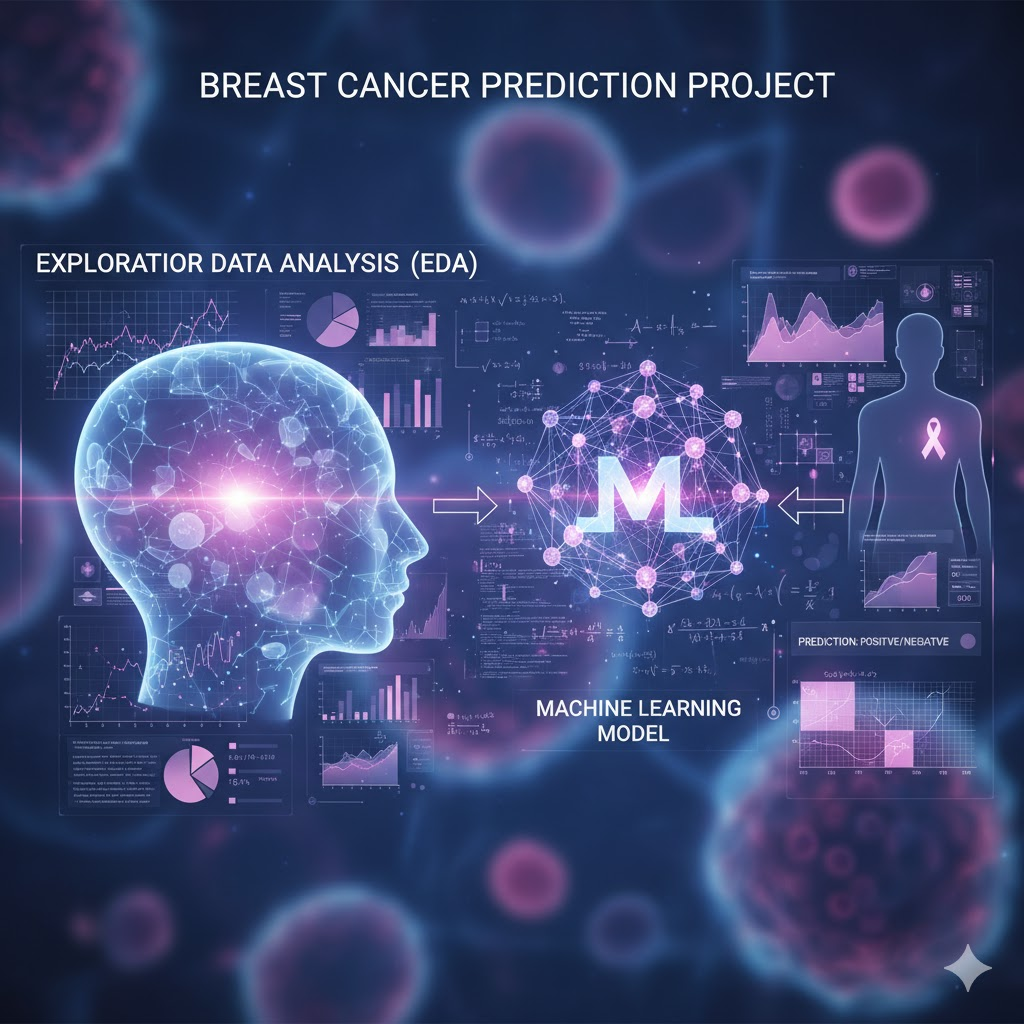

# DATASET LINK :- https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

About Dataset


Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

# **Step 1 : Dowload The Dataset**

In [1]:
# ==========================================================
# 📘 STEP 1: IMPORTING REQUIRED LIBRARY
# ==========================================================
# kagglehub is a Python package that allows you to download datasets directly from Kaggle
import kagglehub

# ==========================================================
# 📥 STEP 2: DOWNLOADING THE BREAST CANCER DATASET
# ==========================================================
# Download the latest version of the 'yasserh/breast-cancer-dataset' from Kaggle
# kagglehub automatically handles authentication and saves the dataset locally
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

# ==========================================================
# 📂 STEP 3: DISPLAYING THE LOCAL PATH
# ==========================================================
# Prints the local file path where the dataset has been downloaded
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'breast-cancer-dataset' dataset.
Path to dataset files: /kaggle/input/breast-cancer-dataset


In [31]:
# ==========================================================
# 📘 STEP 1: IMPORTING REQUIRED LIBRARIES
# ==========================================================

# pandas is used for data manipulation and analysis
import pandas as pd

# seaborn is used for data visualization and plotting graphs
import seaborn as sns

# train_test_split is used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# classification_report provides key evaluation metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report

# Machine Learning Models
# ----------------------------------------------------------
# KNeighborsClassifier: a distance-based algorithm for classification
from sklearn.neighbors import KNeighborsClassifier

# SVC: Support Vector Classifier, useful for complex non-linear classification
from sklearn.svm import SVC

# GaussianNB: Naive Bayes classifier assuming Gaussian (normal) distribution
from sklearn.naive_bayes import GaussianNB

# LogisticRegression: a linear model commonly used for binary classification
from sklearn.linear_model import LogisticRegression

# pickle is used to save the trained ML model for future use (serialization)
import pickle


In [32]:
#loading the dataset
df = pd.read_csv(f'{path}/breast-cancer.csv')

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Step 2 : EDA**

In [6]:
# ==========================================================
# 📊 STEP: CHECK UNIQUE VALUES IN THE 'diagnosis' COLUMN
# ==========================================================
df['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='diagnosis', ylabel='area_mean'>

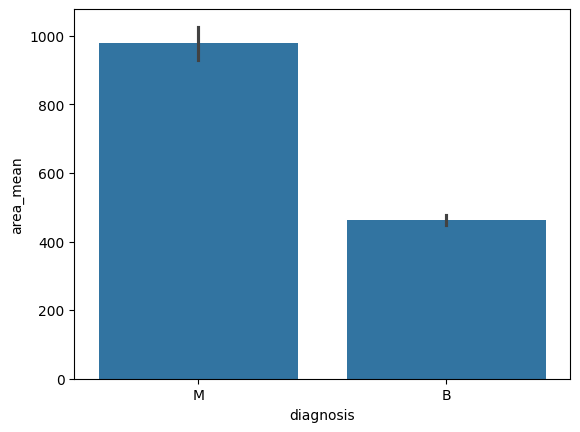

In [12]:
sns.barplot(x = 'diagnosis',y='area_mean',data = df)

In [13]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
x = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]



In [16]:
y = df['diagnosis']

In [17]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


# **Step 3 : Making A Ml Mdel**

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=12)

In [21]:
model_knn = KNeighborsClassifier()
model_nv = GaussianNB()
model_svm = SVC()
model_lr = LogisticRegression()

In [22]:
# training The dataset
model_knn.fit(x_train,y_train)
model_nv.fit(x_train,y_train)
model_lr.fit(x_train,y_train)
model_svm.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [23]:
# testing The dataset
pred_knn = model_knn.predict(x_test)
pred_nv = model_nv.predict(x_test)
pred_lr = model_lr.predict(x_test)
pred_svm = model_svm.predict(x_test)

In [24]:
# print classification report of all
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           B       0.88      0.96      0.91        90
           M       0.91      0.77      0.84        53

    accuracy                           0.89       143
   macro avg       0.89      0.86      0.88       143
weighted avg       0.89      0.89      0.89       143



In [25]:
print(classification_report(y_test,pred_nv))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95        90
           M       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



In [26]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93        90
           M       0.93      0.81      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



In [28]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           B       0.84      0.99      0.91        90
           M       0.97      0.68      0.80        53

    accuracy                           0.87       143
   macro avg       0.91      0.83      0.85       143
weighted avg       0.89      0.87      0.87       143



# **Step 4 : Save Best Model In Pickle File**

In [30]:
# My best model is nv
with open ('Breast_cancer_ml_model.csv','wb') as f:
  pickle.dump (model_svm,f)